![enter image description here](https://img.shields.io/badge/Author-Nestor_Batista_Díaz-yellow)

# **Ejemplo 5:** Escalamiento de datos

In [1]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector

# Creación del conjunto de datos (dos máquinas embotelladoras)
# ==============================================================================
muA, sigmaA = 1000, 1 # media y desviación estándar embotelladora A
muB, sigmaB = 1000, 4 # media y desviación estándar embotelladora B
datosA = np.random.normal(muA, sigmaA, 1000)
datosB = np.random.normal(muB, sigmaB, 1000)
datos=np.column_stack((datosA, datosB))

# Título: ¿qué es un DataFrame?
#Url: https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/#entonces-qu%C3%A9-es-un-dataframe
Data = pd.DataFrame(datos, columns=['Embotelladora_A', 'Embotelladora_B'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_prep_SS = preprocessor_SS.fit_transform(Data)
Data_prep_RR = preprocessor_RR.fit_transform(Data)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)
Data_prep_SS_v2  = preprocessor_SS.transform(Data) # Podemos observar que los resultados son los mismos que el método fit_transform

# Título: Diferencia entre fit_transform() y transform() en Scikit-Learn
# Url: https://forum.huawei.com/enterprise/es/diferencia-entre-fit-transform-y-transform-en-scikit-learn/thread/891275-100757

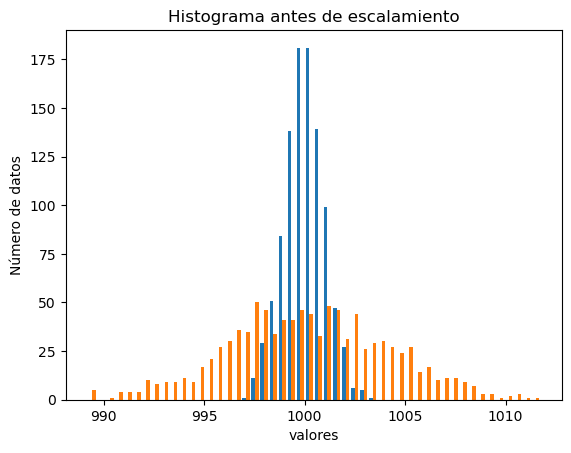

In [2]:
# Histograma antes de escalamiento
plt.hist(Data, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes de escalamiento')
plt.show()

Representacióón de los datos escalado con **Standard Scaler**
 - Estandariación/Escalamiento por desviación típica


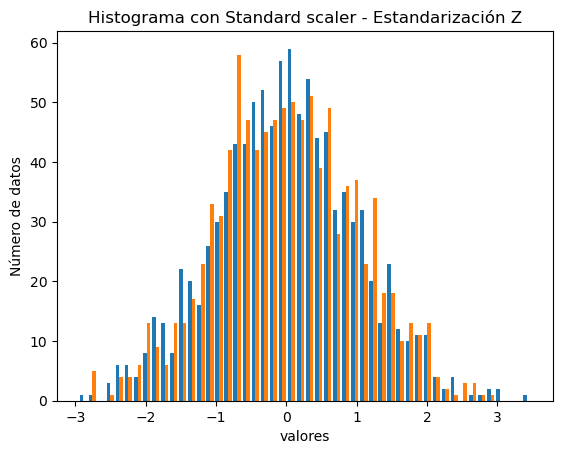

In [3]:
plt.hist(Data_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con Standard scaler - Estandarización Z')
plt.show()

**NOTA** Observar que las **dos** variables tienen la misma desviación típica (s=1)

In [4]:
Data_prep_SS.std()


1.0

Representación de los datos escalado con **Min Max Scaler** - Estandariación/Escalamiento por rangos



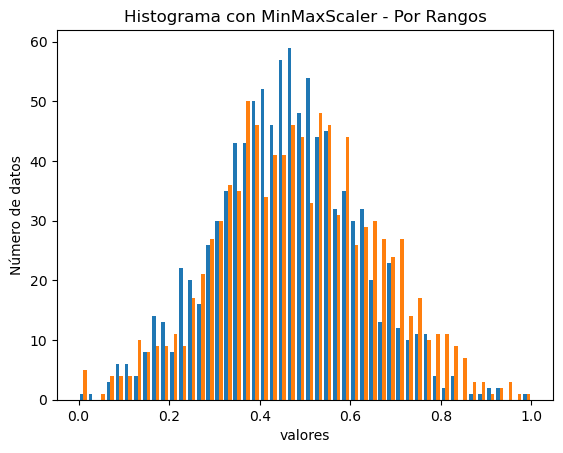

In [5]:
plt.hist(Data_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Por Rangos')
plt.show()

**NOTA** Observar que las **dos** variables tienen el mismo rango

In [6]:
#Rango
#Data_prep_RR[:,0]
np.max(Data_prep_RR[:,0])-np.min(Data_prep_RR[:,0])

1.0

In [7]:
#Rango
#Data_prep_RR[:,1]
np.max(Data_prep_RR[:,1])-np.min(Data_prep_RR[:,1])

1.0

## 1. ¿Cuánto vale la media, mediana, la desviación estándar muestral, la varianza muestral y el rango de la variable X?

In [12]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Media
media = np.mean(X)

# Mediana
mediana = np.median(X)

# Desviación estándar muestral
desviacion_estandar = np.std(X)

# Varianza muestral
varianza = np.var(X)

# Rango
rango = np.max(X) - np.min(X)

print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar muestral:", desviacion_estandar)
print("Varianza muestral:", varianza)
print("Rango:", rango)

Media: 5.5
Mediana: 5.5
Desviación estándar muestral: 2.8722813232690143
Varianza muestral: 8.25
Rango: 9


## 2. Utilizar la función describe() de Panda, para obtener la media, desviación estándar, etc…


In [10]:
X = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

print(X.describe());

count    10.00000
mean      5.50000
std       3.02765
min       1.00000
25%       3.25000
50%       5.50000
75%       7.75000
max      10.00000
dtype: float64


## 3. ¿Por qué el resultado de calcular la desviación estándar con Numpy es diferente a la calculada por describe de Panda? ¿Qué ajuste sería necesario realizar para que los resultados fuesen similares/iguales?


Por defecto, en NumPy, ddof es 0, lo que significa que se está calculando la desviación estándar y la varianza de la población. Sin embargo, en estadísticas, cuando trabajamos con muestras en lugar de poblaciones completas, a menudo queremos ajustar los cálculos para tener en cuenta los grados de libertad perdidos al estimar parámetros poblacionales a partir de la muestra. En este caso, se utiliza ddof=1.

Para que los datos fuesen iguales o parecidos habria que añadir el parametro ddof al metodo de NumPy:

In [14]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Desviación estándar muestral
desviacion_estandar = np.std(X, ddof=1)

print("Desviación estándar muestral:", desviacion_estandar)

Desviación estándar muestral: 3.0276503540974917


## 4. Estandarizar la variable (escalamiento) mediante rangos y a continuación calcular la media y la mediana de la variable escalada

$  X_{\text{escalado}} = \frac{X - \text{min}(X)}{\text{max}(X) - \text{min}(X)}  $

In [15]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Rango
rango = np.max(X) - np.min(X)

# Estandarizar mediante rangos
X_escalado = (X - np.min(X)) / rango

# Calcular la media y la mediana de la variable escalada
media_escalada = np.mean(X_escalado)
mediana_escalada = np.median(X_escalado)

print("Media de la variable escalada:", media_escalada)
print("Mediana de la variable escalada:", mediana_escalada)

Media de la variable escalada: 0.5
Mediana de la variable escalada: 0.5


## 5. Repetir el apartado anterior con el escalamiento Z - score

$ Z = \frac{X - \text{media}(X)}{\text{desviación estándar}(X)} $

In [18]:
X = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Estandarizar mediante Z-score
X_zscore = (X - X.mean()) / X.std()

# Calcular la media y la mediana de la variable estandarizada
media_zscore = np.mean(X_zscore)
mediana_zscore = np.median(X_zscore)

print("Media de la variable estandarizada (Z-score):", media_zscore)
print("Mediana de la variable estandarizada (Z-score):", mediana_zscore)

Media de la variable estandarizada (Z-score): 4.4408920985006264e-17
Mediana de la variable estandarizada (Z-score): 0.0
